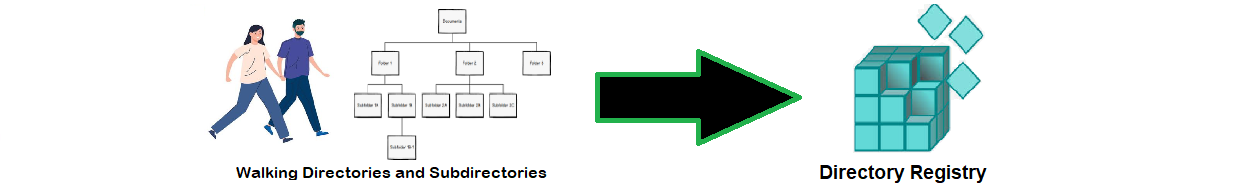

# Data Directory Discovery 
#### Joe Eberle, Alan Calhoun, Helmi (Al)  Seoud Code Refactored ON  : 9/20/2022  ---  Revised ON  : 10/19/2022

### Project Setup - Importing Libraries and Initializing Global Variables 

In [1]:
# Import the necessary Libraries 
import configparser
import pandas as pd 
import glob, os
from pathlib import Path
import timeit
from datetime import date, datetime

# Establish some import parameters 
solution_name = 'data_directory_discovery'

# Initialize the confuration settings parser engine to get and set parameters 
config = configparser.ConfigParser()
config.read('config.ini') 

import_directory_file_number = 0 
import_file_number = 0  

## Project Setup -    Establishing DataFrames & Establishing Global Functions

In [2]:
# Create dataframe to house Directories  - Directory Name Redundancy is due to PANDAS problem with having only ONE column 
def create_directory_dataframe():
    df_import_directories = pd.DataFrame(columns = ('directory','directory_table_name'))
    return df_import_directories  

def add_import_directory(directory):
    global import_directory_file_number 
    import_directory_file_number += 1  
    df_import_directories.loc[import_directory_file_number] = directory
    return import_directory_file_number 

## Step 1 - Initialize Registries and Establish the root  Directory 

In [3]:
data_import_starting_directory = config.get('data_discovery', 'Data_Import_Starting_Directory_Work') 
import_directory_file_number = 0 
df_import_directories = create_directory_dataframe() 
 
# To Unit Test the function set  developing_and_testing from False to True  
developing_and_testing = True  
if developing_and_testing:
    status = f'\nStep 1 - Initialize Registries and Establish the root Directory'        
    status = status + f'\nThe root directory to walk is : {data_import_starting_directory}'    
    status = status + f'\nThe number of directories discovered is : {import_directory_file_number}' 
    status = status + f'\nThe number of files discovered for import discovered is : {import_directory_file_number}'      
    print(status)


Step 1 - Initialize Registries and Establish the root Directory
The root directory to walk is : C:/Data/
The number of directories discovered is : 0
The number of files discovered for import discovered is : 0


## Visually Inspect that directory registry is blank

In [4]:
df_import_directories.head()

,directory,directory_table_name


## Step 2 - Walk the directory structure discovering data to discover all data directories

In [5]:
def walk_sub_directories(root_directory):
    status = f'\nWalking Directory: {root_directory}'  
    directory_entry = 0 
    for root, subdirectories, files in os.walk(root_directory):
        directory_entry += 1         
        status = status + f'\nRegistering #{directory_entry} Directory {root} '          
        num = add_import_directory(root)        
    return status

walk_sub_directories(data_import_starting_directory)  
# To Unit Test the function set testing from False to True  
import_directory_file_number = 0 
import_file_number = 0  
testing = True  
if testing:
    status = walk_sub_directories(data_import_starting_directory)      
    print(status)    
    status = f'\nStep 2 - walk all of the sub directories under the root '    
    status = status + f'\nThe root directory to walk is : {data_import_starting_directory}'    
    status = status + f'\nThe number of directories discovered is : {import_directory_file_number}' 
    status = status + f'\nThe number of files discovered for import discovered is : {import_directory_file_number}'      
    print(status)
 


Walking Directory: C:/Data/
Registering #1 Directory C:/Data/ 
Registering #2 Directory C:/Data/Behavioral Health 
Registering #3 Directory C:/Data/brfss_cdc 
Registering #4 Directory C:/Data/Chronic Kidney Disease 
Registering #5 Directory C:/Data/Chronic_Disease_Indicators 
Registering #6 Directory C:/Data/Data_Science_Data 
Registering #7 Directory C:/Data/Data_Science_Data\Projects 
Registering #8 Directory C:/Data/Data_Science_Data\Projects\AIHS 
Registering #9 Directory C:/Data/Data_Science_Data\Projects\AIHS\Architecture 
Registering #10 Directory C:/Data/Data_Science_Data\Projects\AIHS\Chatbot Initial Conversation - Botsociety_files 
Registering #11 Directory C:/Data/Data_Science_Data\Test_Data 
Registering #12 Directory C:/Data/Data_Science_Data\Test_Data\India Health Stats 
Registering #13 Directory C:/Data/Data_Science_Data\Test_Data\Medicare 
Registering #14 Directory C:/Data/Data_Science_Data\Test_Data\Mental_Health_FAQ_for_Chatbot 
Registering #15 Directory C:/Data/Data_

## Visually Inspect that directory registry contains directories

In [6]:
# Persist the registry to disk 
df_import_directories.to_excel('c:/working_directory/excel/import_directory_registry.xlsx', index=False)
df_import_directories = pd.read_excel('c:/working_directory/excel/import_directory_registry.xlsx')
df_import_directories.head(100)

,directory,directory_table_name
0,C:/Data/,C:/Data/
1,C:/Data/Behavioral Health,C:/Data/Behavioral Health
2,C:/Data/brfss_cdc,C:/Data/brfss_cdc
3,C:/Data/Chronic Kidney Disease,C:/Data/Chronic Kidney Disease
4,C:/Data/Chronic_Disease_Indicators,C:/Data/Chronic_Disease_Indicators
5,C:/Data/Data_Science_Data,C:/Data/Data_Science_Data
6,C:/Data/Data_Science_Data\Projects,C:/Data/Data_Science_Data\Projects
7,C:/Data/Data_Science_Data\Projects\AIHS,C:/Data/Data_Science_Data\Projects\AIHS
8,C:/Data/Data_Science_Data\Projects\AIHS\Archit...,C:/Data/Data_Science_Data\Projects\AIHS\Archit...
9,C:/Data/Data_Science_Data\Projects\AIHS\Chatbo...,C:/Data/Data_Science_Data\Projects\AIHS\Chatbo...
